<a href="https://colab.research.google.com/github/YoshitakaNaraoka/gColabNotebooks/blob/main/%E3%82%B1%E3%83%A2%E3%82%A4%E3%83%B3%E3%83%95%E3%82%A9%E7%A0%82%E5%A0%B4%E5%85%BC%E5%82%99%E5%BF%98%E9%8C%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# install module
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [7]:
# rdkit内のChemモジュールを読み込む(ここをいったん動かさないと以下のChem.~が動いてくれない)
from rdkit.Chem import Descriptors, Draw

from Mol_List import mol_list

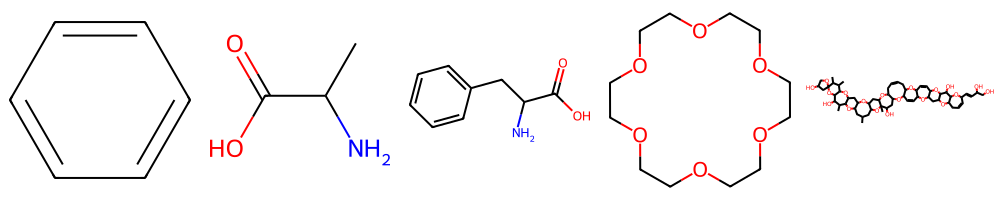

In [79]:
Draw.MolsToImage(mol_list)

In [8]:
# TPSA(極性表面積)-細胞膜透過性の指標

mols = [x for x in mol_list if x is not None]
len(mols) # 2
### TPSAの計算
declist = Descriptors.descList
calc = {}
for (i,j) in declist:
    calc[i] = j
tpsa = [calc['TPSA'](i) for i in mols]
### 描画
print(tpsa)

[0.0, 63.31999999999999, 63.31999999999999, 55.38000000000001, 241.36999999999995]


In [ ]:
# 水溶性の評価